In [1]:
import pandas as pd
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math
from functools import reduce
import matplotlib 
import gpplot as gpp 
#gpp.set_aesthetics(context = 'paper')


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Arial'
})


In [2]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)


Pandas version: 2.0.3
Numpy version: 1.24.4


In [3]:
# 
inPath = "../Data/PrimaryLibrary/processed_z_score/"
merged_df = pd.read_csv(inPath + "inHouseDatasetsCombined.csv")
non_ess_merged_df =merged_df[merged_df['Category'] == 'Non-essential']
figure1_outpath = '../Figure/Figure 1/Individual Figures/'

In [4]:
len(non_ess_merged_df)

45316

In [5]:
designFile = pd.read_csv('../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
designFile = designFile[['Target Gene Symbol','sgRNA Sequence'] + [x for x in designFile.columns if x.endswith('Bin I Matches')]]


In [6]:
nonEssWithCFD = pd.merge(non_ess_merged_df, designFile, on =['Target Gene Symbol', 'sgRNA Sequence'])

In [7]:

nonEssWithCFD['BinI (CFD = 1)'] = nonEssWithCFD[[x for x in nonEssWithCFD.columns if x.endswith('Bin I Matches')]].sum(axis=1)


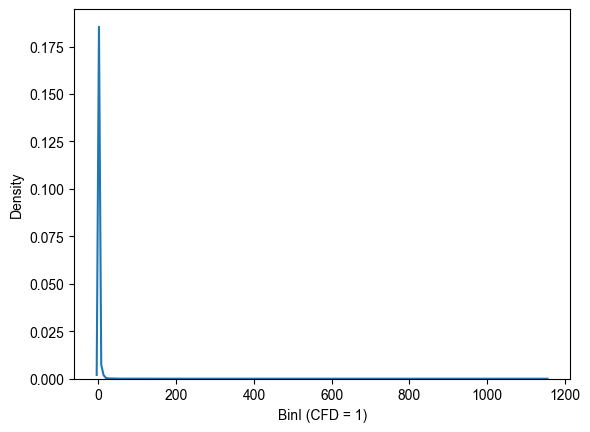

In [8]:
sns.kdeplot(data = nonEssWithCFD, x='BinI (CFD = 1)')
plt.savefig(figure1_outpath + 'off target sites CRISPRi.pdf',
           dpi=300, bbox_inches='tight')

In [9]:

nonEssWithCFD['BinI bins'] = nonEssWithCFD['BinI (CFD = 1)'].\
    apply(lambda x: str(x) if x <= 0 else '>0')
order = ['0.0', '>0']
#['0.0', '1.0', '>1'] ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '>5'] ['0.0', '>0'] ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '>10']
figure_bin = '2bins'

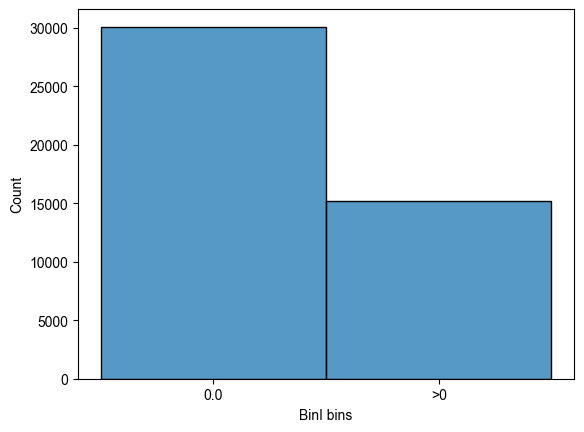

In [10]:
nonEssWithCFD['BinI bins'] = pd.Categorical(nonEssWithCFD['BinI bins'], 
                                                   order)

sns.histplot(data = nonEssWithCFD, x='BinI bins')
plt.savefig(figure1_outpath + 'off target samples '+figure_bin+'.pdf',
           dpi=300, bbox_inches='tight')

In [11]:
nonEssWithCFD.head()

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,TSS Bucket,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,...,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,# Off-Target Tier I Match Bin I Matches,# Off-Target Tier II Match Bin I Matches,# Off-Target Tier III Match Bin I Matches,BinI (CFD = 1),BinI bins
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,"[-50, 0)",0.216872,0.023685,...,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,0.0,0.0,0.0,0.0,0.0
1,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,"[-200, -100)",-0.292964,-1.334599,...,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,0.0,0.0,0.0,0.0,0.0
2,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,"[500, 1000)",-0.497395,-1.879237,...,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,0.0,0.0,0.0,0.0,0.0
3,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,"[-50, 0)",0.410484,0.539497,...,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,0.0,0.0,0.0,0.0,0.0
4,APOBEC1,Non-essential,7665908.0,AAAAAAAATTTGGTTAGGCA,AAAAAAAAAAAATTTGGTTAGGCATGGTGG,-1.46100,980.0,"[500, 1000)",-0.055772,-0.702684,...,-0.113104,0.335288,0.168153,0.074993,-0.506237,0.0,0.0,0.0,0.0,0.0


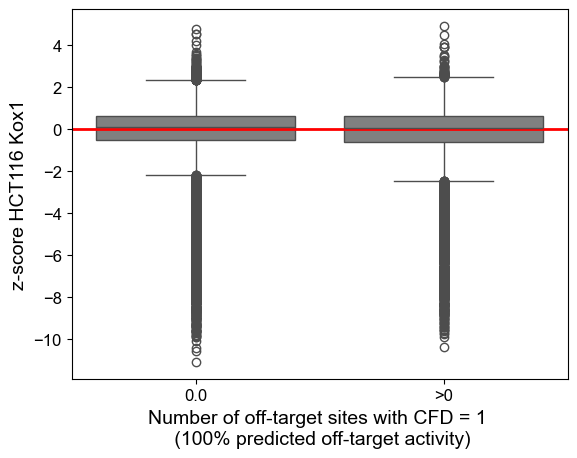

In [12]:
ax = sns.boxplot(data = nonEssWithCFD,x = 'BinI bins', y = 'z_scored_avg_lfc_HCT116_Kox1', 
            order = order, 
                 color = 'grey')

ax.axhline(y=0.001546, linewidth=2, color='red', ls='-')# avaerage intergenic control 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of off-target sites with CFD = 1 \n (100% predicted off-target activity)', fontsize=14)
plt.ylabel('z-score HCT116 Kox1', fontsize=14)

plt.savefig(figure1_outpath + 'off target boxplot '+figure_bin+'.pdf',
           dpi=300, bbox_inches='tight')


In [13]:

# Threshold
threshold = -2

# Calculate the percentage of values under the threshold for each category
percentage_under_threshold_HCT116_Kox1 = nonEssWithCFD[nonEssWithCFD['z_scored_avg_lfc_HCT116_Kox1'] < threshold].groupby('BinI bins')['z_scored_avg_lfc_HCT116_Kox1'].count() / nonEssWithCFD.groupby('BinI bins')['z_scored_avg_lfc_HCT116_Kox1'].count() * 100


# Map the calculated percentages to the original DataFrame
nonEssWithCFD['percentage_under_threshold_HCT116_Kox1'] = nonEssWithCFD['BinI bins'].map(percentage_under_threshold_HCT116_Kox1)

# Calculate the percentage of values under the threshold for each category
percentage_under_threshold_HCT116_Zim3 = nonEssWithCFD[nonEssWithCFD['z_scored_avg_lfc_HCT116_Zim3'] < threshold].groupby('BinI bins')['z_scored_avg_lfc_HCT116_Zim3'].count() / nonEssWithCFD.groupby('BinI bins')['z_scored_avg_lfc_HCT116_Zim3'].count() * 100

# Map the calculated percentages to the original DataFrame
nonEssWithCFD['percentage_under_threshold_HCT116_Zim3'] = nonEssWithCFD['BinI bins'].map(percentage_under_threshold_HCT116_Zim3)



# Calculate the percentage of values under the threshold for each category
percentage_under_threshold_A549_Kox1 = nonEssWithCFD[nonEssWithCFD['z_scored_avg_lfc_A549_Kox1'] < threshold].groupby('BinI bins')['z_scored_avg_lfc_A549_Kox1'].count() / nonEssWithCFD.groupby('BinI bins')['z_scored_avg_lfc_A549_Kox1'].count() * 100

# Map the calculated percentages to the original DataFrame
nonEssWithCFD['percentage_under_threshold_A549_Kox1'] = nonEssWithCFD['BinI bins'].map(percentage_under_threshold_A549_Kox1)

# Calculate the percentage of values under the threshold for each category
percentage_under_threshold_A549_Zim3 = nonEssWithCFD[nonEssWithCFD['z_scored_avg_lfc_A549_Zim3'] < threshold].groupby('BinI bins')['z_scored_avg_lfc_A549_Zim3'].count() / nonEssWithCFD.groupby('BinI bins')['z_scored_avg_lfc_A549_Zim3'].count() * 100

# Map the calculated percentages to the original DataFrame
nonEssWithCFD['percentage_under_threshold_A549_Zim3'] = nonEssWithCFD['BinI bins'].map(percentage_under_threshold_A549_Zim3)


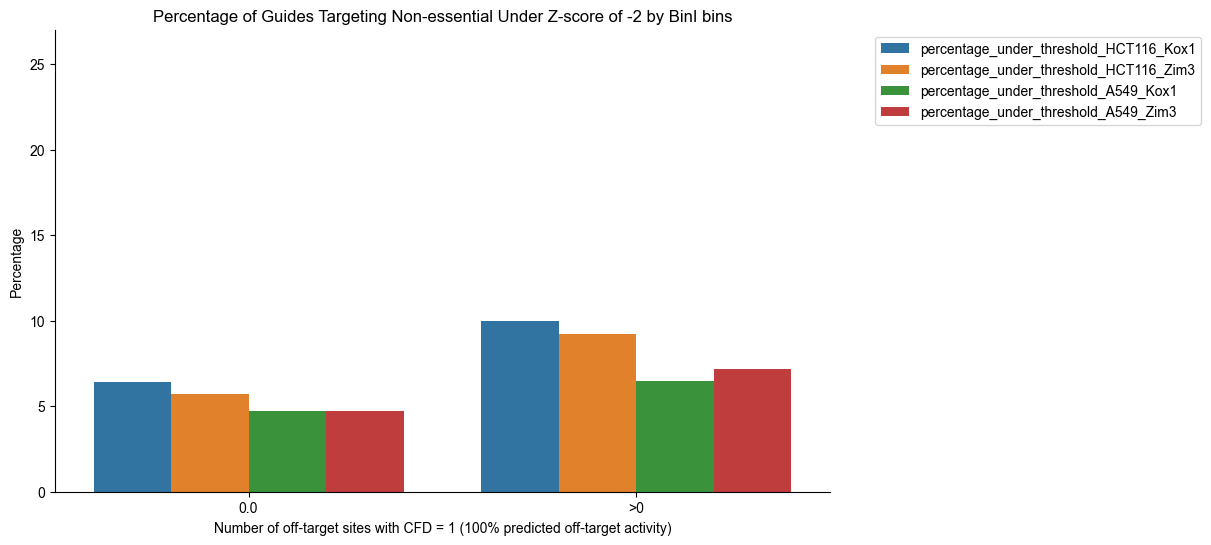

In [14]:
test = nonEssWithCFD[['BinI bins', 'percentage_under_threshold_HCT116_Kox1',
                             'percentage_under_threshold_HCT116_Zim3', 'percentage_under_threshold_A549_Kox1',
                            'percentage_under_threshold_A549_Zim3']].drop_duplicates()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BinI bins', y='value',hue='variable', data=test.melt('BinI bins'),
            order = order)
plt.title('Percentage of Guides Targeting Non-essential Under Z-score of -2 by BinI bins')
plt.xlabel('Number of off-target sites with CFD = 1 (100% predicted off-target activity)')
plt.ylabel('Percentage')
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
ax.set_ylim(0,27)


plt.savefig(figure1_outpath + 'off-target_v2_'+figure_bin+'.pdf', dpi=400, bbox_inches='tight')

plt.show()


In [15]:
sum(nonEssWithCFD['z_scored_avg_lfc_A549_Kox1']<-2)/len(nonEssWithCFD)

0.052917291905728664

In [16]:
sum(nonEssWithCFD['z_scored_avg_lfc_A549_Zim3']<-2)/len(nonEssWithCFD)

0.055256421572954365

In [17]:
sum(nonEssWithCFD['z_scored_avg_lfc_HCT116_Kox1']<-2)/len(nonEssWithCFD)

0.07593344514078912

In [18]:
sum(nonEssWithCFD['z_scored_avg_lfc_HCT116_Zim3']<-2)/len(nonEssWithCFD)

0.06884985435607732

In [19]:
commonGuideNonEss = nonEssWithCFD[['Target Gene Symbol', 'sgRNA Sequence','z_scored_avg_lfc_A549_Kox1', 'z_scored_avg_lfc_HCT116_Kox1', 
               'z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_HCT116_Zim3']].copy()


In [20]:
print(f'HCT116_Kox1 <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_HCT116_Kox1"] < -2)])} \n'
      f'HCT116_Zim3 <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_HCT116_Zim3"] < -2)])} \n'
      f'HCT116_Kox1 and HCT116_Zim3 both <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_HCT116_Kox1"] < -2) & (nonEssWithCFD["z_scored_avg_lfc_HCT116_Zim3"] < -2)])} \n'
      f'A549_Kox1 <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_A549_Kox1"] < -2)])} \n'
      f'A549_Zim3 <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_A549_Zim3"] < -2)])} \n'
      f'A549_Kox1 and A549_Zim3 both <-2 is {len(nonEssWithCFD[(nonEssWithCFD["z_scored_avg_lfc_A549_Kox1"] < -2) & (nonEssWithCFD["z_scored_avg_lfc_A549_Zim3"] < -2)])}')


HCT116_Kox1 <-2 is 3441 
HCT116_Zim3 <-2 is 3120 
HCT116_Kox1 and HCT116_Zim3 both <-2 is 2712 
A549_Kox1 <-2 is 2398 
A549_Zim3 <-2 is 2504 
A549_Kox1 and A549_Zim3 both <-2 is 1876


In [25]:
2712/3441

0.7881429816913688

In [26]:
2712/3120

0.8692307692307693

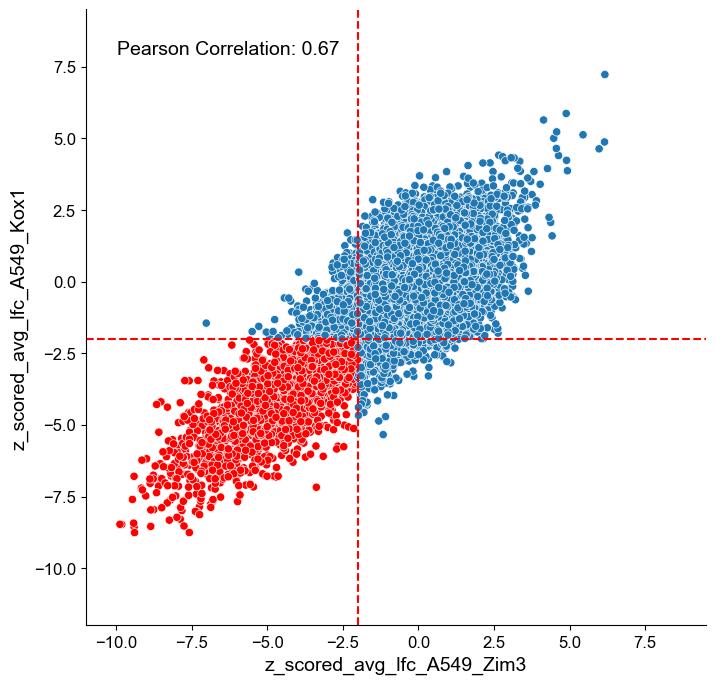

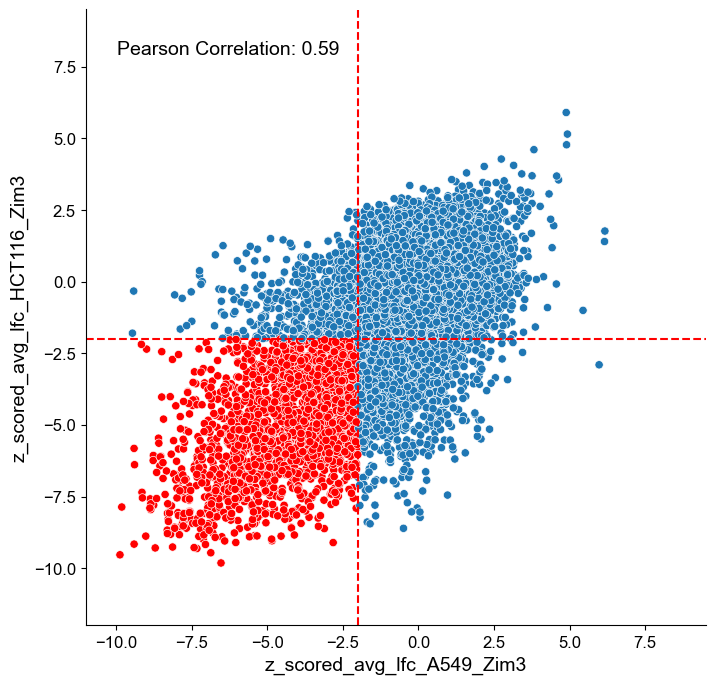

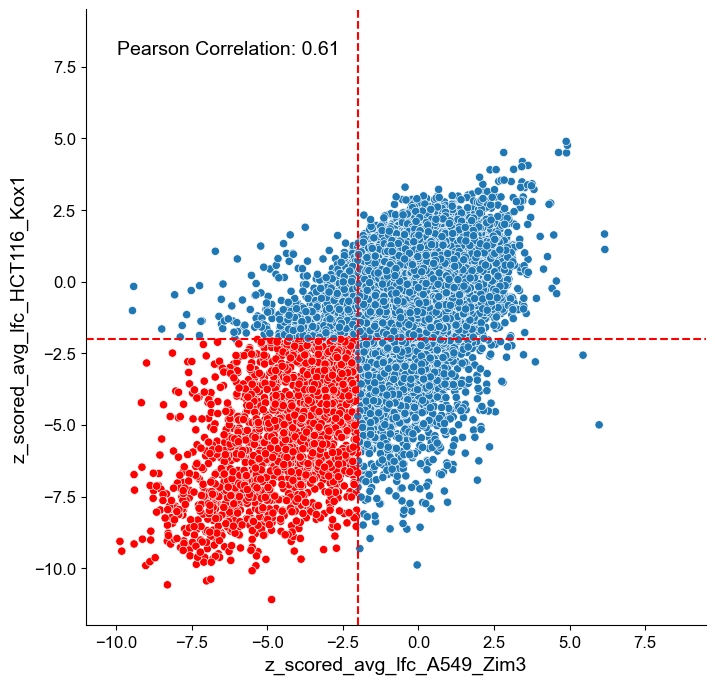

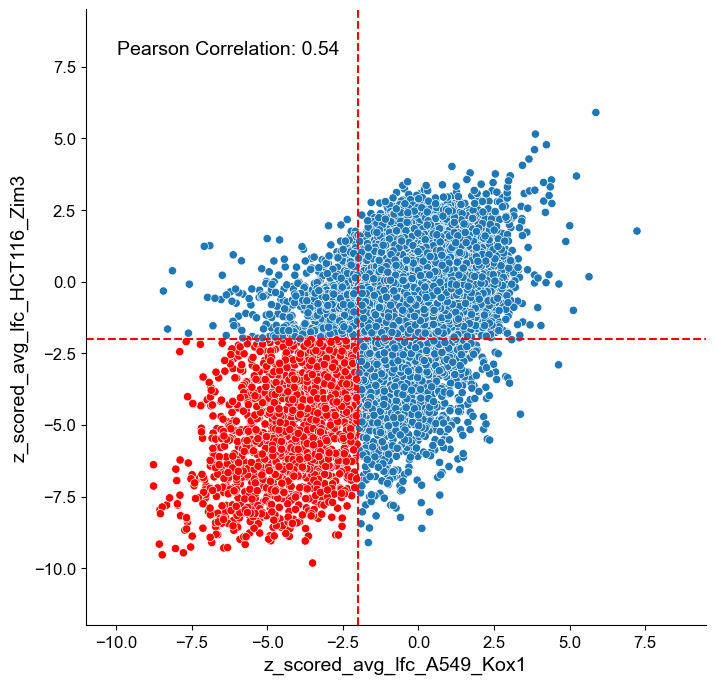

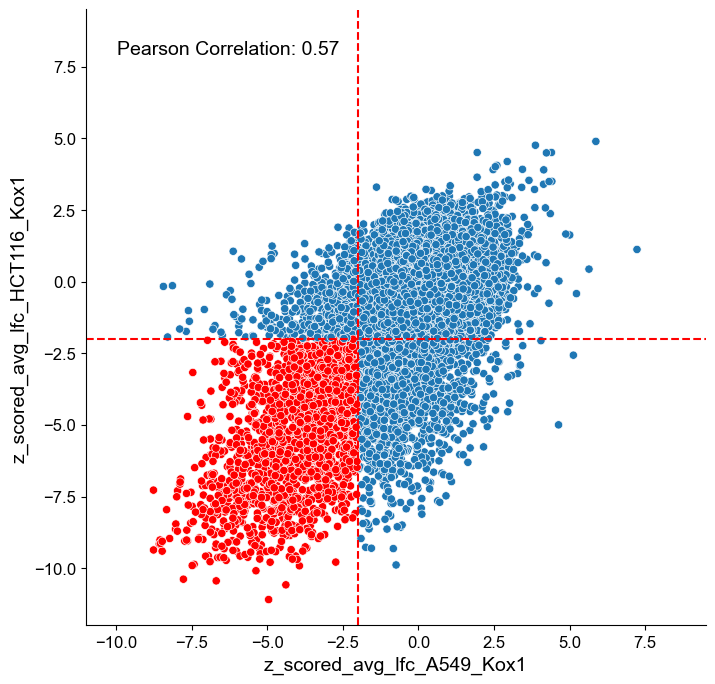

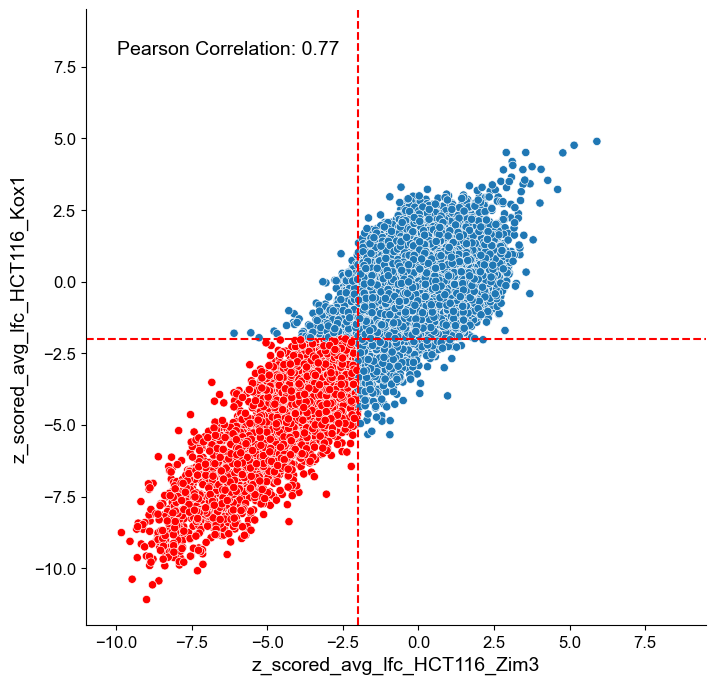

In [27]:
columns = ['z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_A549_Kox1', 'z_scored_avg_lfc_HCT116_Zim3', 'z_scored_avg_lfc_HCT116_Kox1']

# Create scatter plots for each pair
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(8, 8))
        colors = ['red' if row[columns[i]] < -2 and row[columns[j]] < -2 else '#1f77b4' for index, row in commonGuideNonEss.iterrows()]

        ax = sns.scatterplot(data = nonEssWithCFD, x = columns[i], 
                        y = columns[j],
                        c=colors)
        sns.despine()
        plt.axvline(x=-2, color='r', linestyle='--', label='x=2')
        plt.axhline(y=-2, color='r', linestyle='--', label='x=2')
        plt.xlabel(columns[i], fontsize=14)
        plt.ylabel(columns[j], fontsize=14)
                
        # Calculate the Pearson correlation
        corr = commonGuideNonEss[[columns[i], columns[j]]].corr(method = 'pearson').iloc[0, 1]
        
        # Plot title with correlation
        plt.text(0.05, 0.95, f'Pearson Correlation: {corr:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
        ax.set_xlim(-11, 9.5)
        ax.set_ylim(-12, 9.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
#         #plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]} (Pearson Correlation: {corr:.2f})')

        # Save the figure to desktop
        figure_name = f'Scatter_offTargetNonEss_{columns[i]}_vs_{columns[j]}.pdf'

        plt.savefig(figure1_outpath + figure_name, format='pdf', dpi=300, 
                    bbox_inches='tight')


#         #plt.show()


Scatter Plot of z_scored_avg_lfc_A549_Zim3 vs z_scored_avg_lfc_A549_Kox1 (Pearson Correlation: 0.67)
61.9960343688037 percent of guides are under z < -2 out of union of guide under z <-2)
Scatter Plot of z_scored_avg_lfc_A549_Zim3 vs z_scored_avg_lfc_HCT116_Zim3 (Pearson Correlation: 0.59)
45.850622406639005 percent of guides are under z < -2 out of union of guide under z <-2)
Scatter Plot of z_scored_avg_lfc_A549_Zim3 vs z_scored_avg_lfc_HCT116_Kox1 (Pearson Correlation: 0.61)
46.21249385145106 percent of guides are under z < -2 out of union of guide under z <-2)
Scatter Plot of z_scored_avg_lfc_A549_Kox1 vs z_scored_avg_lfc_HCT116_Zim3 (Pearson Correlation: 0.54)
42.32654114005675 percent of guides are under z < -2 out of union of guide under z <-2)
Scatter Plot of z_scored_avg_lfc_A549_Kox1 vs z_scored_avg_lfc_HCT116_Kox1 (Pearson Correlation: 0.57)
42.34519746465139 percent of guides are under z < -2 out of union of guide under z <-2)
Scatter Plot of z_scored_avg_lfc_HCT116_Zim3 vs

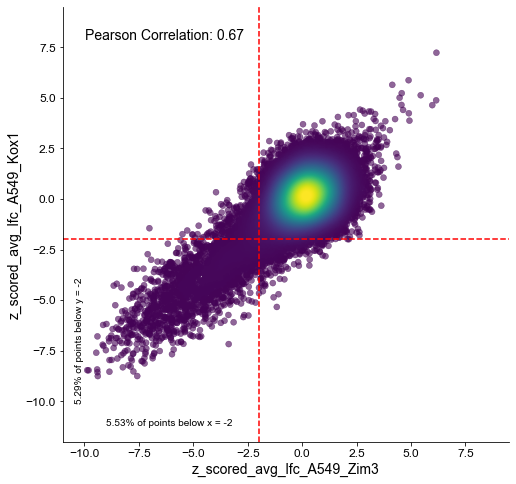

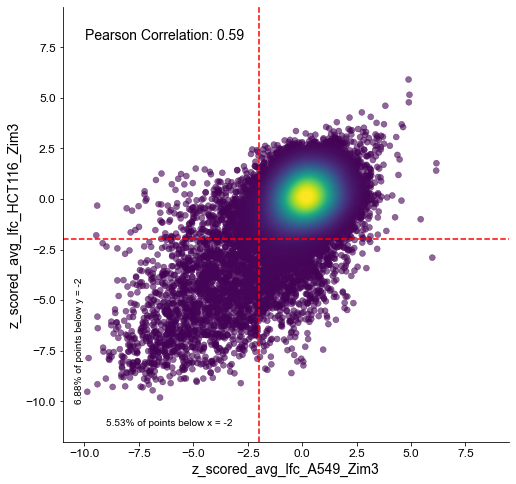

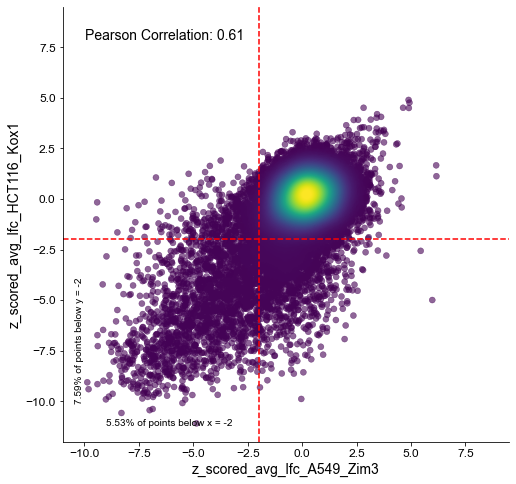

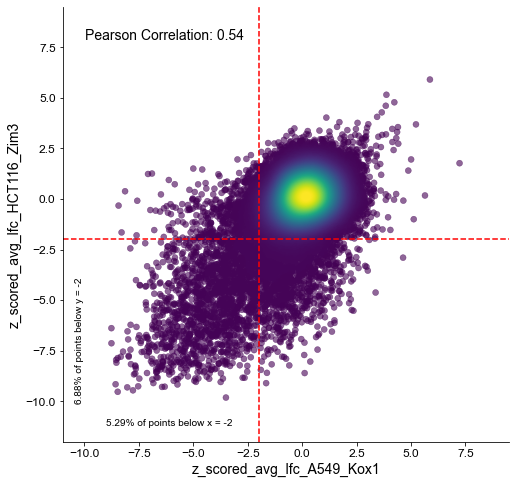

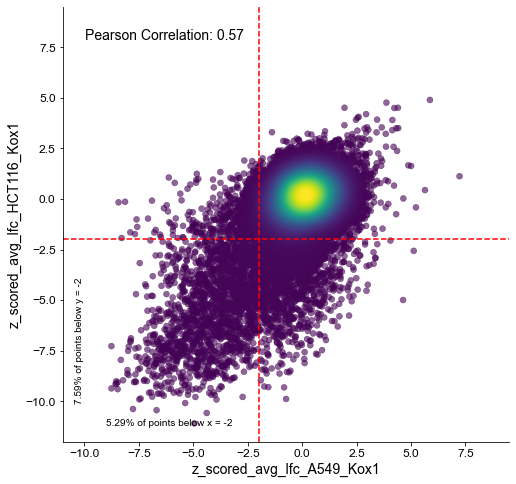

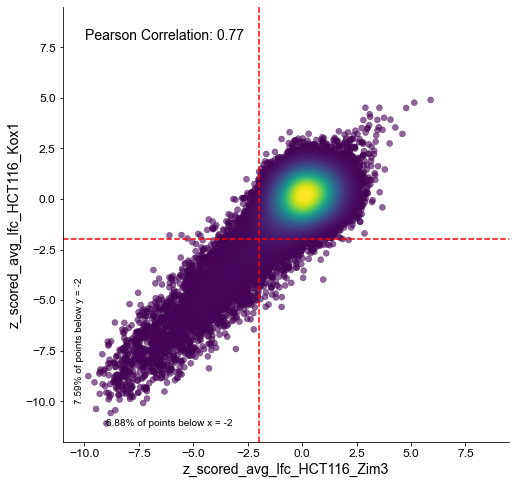

In [24]:
columns = ['z_scored_avg_lfc_A549_Zim3', 'z_scored_avg_lfc_A549_Kox1', 'z_scored_avg_lfc_HCT116_Zim3', 'z_scored_avg_lfc_HCT116_Kox1']
import gpplot
# Create scatter plots for each pair
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(8, 8))
        colors = ['red' if row[columns[i]] < -2 and row[columns[j]] < -2 else '#1f77b4' for index, row in commonGuideNonEss.iterrows()]

        ax = gpplot.point_densityplot(data = nonEssWithCFD, x = columns[i], 
                        y = columns[j], palette=gpplot.sequential_cmap())
        sns.despine()
        plt.axvline(x=-2, color='r', linestyle='--', label='x=2')
        plt.axhline(y=-2, color='r', linestyle='--', label='x=2')
        plt.xlabel(columns[i], fontsize=14)
        plt.ylabel(columns[j], fontsize=14)
                
        # Calculate the Pearson correlation
        corr = commonGuideNonEss[[columns[i], columns[j]]].corr(method = 'pearson').iloc[0, 1]
        
        # Plot title with correlation
        plt.text(0.05, 0.95, f'Pearson Correlation: {corr:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=14)
        ax.set_xlim(-11, 9.5)
        ax.set_ylim(-12, 9.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        bothUnderNeg2 = len(commonGuideNonEss[(commonGuideNonEss[columns[i]]< -2) & (commonGuideNonEss[columns[j]]< -2)])
        eitherUnderNeg2 = len(commonGuideNonEss[(commonGuideNonEss[columns[i]]< -2) | (commonGuideNonEss[columns[j]]< -2)])
        print(f'Scatter Plot of {columns[i]} vs {columns[j]} (Pearson Correlation: {corr:.2f})')
        print(f'{100*bothUnderNeg2/eitherUnderNeg2} percent of guides are under z < -2 out of union of guide under z <-2)')

        percent_below_x = 100*sum(commonGuideNonEss[columns[i]] < -2)/len(commonGuideNonEss[columns[i]])
        percent_below_y = 100*sum(commonGuideNonEss[columns[j]] < -2)/len(commonGuideNonEss[columns[j]])

        plt.annotate(f'{percent_below_x:.2f}% of points below x = -2', xy=(-9, -11.2), 
                     xytext=(-9, -11.2))
        plt.annotate(f'{percent_below_y:.2f}% of points below y = -2',
             xy=(-10,-7),  # Point to be annotated
             xytext=(-10,-7),  # Position of the annotation text
             ha='right',  # Horizontal alignment
             va='center',  # Vertical alignment
             rotation=90)

        # Annotate the percentage on the plot

#         #plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]} (Pearson Correlation: {corr:.2f})')

#        Save the figure to desktop
        figure_name = f'Scatter_offTargetNonEss_{columns[i]}_vs_{columns[j]}_v2.pdf'

        plt.savefig(figure1_outpath + figure_name, format='pdf', dpi=300, 
                    bbox_inches='tight')

